## ADS-PHASE-4

#PROJECT TITLE-ELECTRICITY PRICES PREDICTION

#TEAM NO-1

#---------PREPARED BY  A Jaibharath M(team member)


In [15]:
#importing necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [16]:
#loading data set
file_path = r"C:\Users\Saranya\Downloads\archive (4)\Electricity.csv"
encoding = "ISO-8859-1"
df = pd.read_csv(file_path, encoding=encoding)
df

C:\Users\Saranya\AppData\Local\Temp\ipykernel_17812\2962181673.py:4: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)


,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,31/12/2013 21:30,New Year's Eve,1,1,1,31,12,2013,43,1179.14,3932.22,34.51,6.00,22.20,285.31,812.0,3692.95,42.45
38010,31/12/2013 22:00,New Year's Eve,1,1,1,31,12,2013,44,1152.01,3821.44,33.83,5.00,24.10,278.31,852.0,3571.0,33.83
38011,31/12/2013 22:30,New Year's Eve,1,1,1,31,12,2013,45,1123.67,3724.21,31.75,4.00,20.40,280.91,962.0,3460.29,31.75
38012,31/12/2013 23:00,New Year's Eve,1,1,1,31,12,2013,46,1094.24,3638.16,33.83,5.00,14.80,302.46,950.0,3563.99,50.6


In [17]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 38014 non-null  object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [18]:
df.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [19]:
#to display null values
df.isnull()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
38010,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
38011,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
38012,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
# Define the categorical column(s) you want to one-hot encode
categorical_columns = ['HolidayFlag']
# Perform one-hot encoding using get_dummies
df_encoded = pd.get_dummies(df, columns=categorical_columns)

In [21]:
# Display the one-hot encoded DataFrame
print(df_encoded)

               DateTime         Holiday  DayOfWeek  WeekOfYear  Day  Month  \
0      01/11/2011 00:00            None          1          44    1     11   
1      01/11/2011 00:30            None          1          44    1     11   
2      01/11/2011 01:00            None          1          44    1     11   
3      01/11/2011 01:30            None          1          44    1     11   
4      01/11/2011 02:00            None          1          44    1     11   
...                 ...             ...        ...         ...  ...    ...   
38009  31/12/2013 21:30  New Year's Eve          1           1   31     12   
38010  31/12/2013 22:00  New Year's Eve          1           1   31     12   
38011  31/12/2013 22:30  New Year's Eve          1           1   31     12   
38012  31/12/2013 23:00  New Year's Eve          1           1   31     12   
38013  31/12/2013 23:30  New Year's Eve          1           1   31     12   

       Year  PeriodOfDay ForecastWindProduction SystemLoadEA  S

In [22]:
#scaling
scaler = StandardScaler()
df['Day'] = scaler.fit_transform(df['Day'].values.reshape(-1, 1))
df

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,-1.674147,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,-1.674147,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,-1.674147,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,-1.674147,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,-1.674147,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,31/12/2013 21:30,New Year's Eve,1,1,1,1.733344,12,2013,43,1179.14,3932.22,34.51,6.00,22.20,285.31,812.0,3692.95,42.45
38010,31/12/2013 22:00,New Year's Eve,1,1,1,1.733344,12,2013,44,1152.01,3821.44,33.83,5.00,24.10,278.31,852.0,3571.0,33.83
38011,31/12/2013 22:30,New Year's Eve,1,1,1,1.733344,12,2013,45,1123.67,3724.21,31.75,4.00,20.40,280.91,962.0,3460.29,31.75
38012,31/12/2013 23:00,New Year's Eve,1,1,1,1.733344,12,2013,46,1094.24,3638.16,33.83,5.00,14.80,302.46,950.0,3563.99,50.6


In [36]:
df = df.drop(df.columns[0], axis=1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DayOfWeek                     38014 non-null  int64  
 1   WeekOfYear                    38014 non-null  int64  
 2   Day                           38014 non-null  float64
 3   Month                         38014 non-null  int64  
 4   Year                          38014 non-null  int64  
 5   PeriodOfDay                   38014 non-null  int64  
 6   ForecastWindProduction        38014 non-null  object 
 7   SystemLoadEA                  38014 non-null  object 
 8   SMPEA                         38014 non-null  object 
 9   ORKTemperature                38014 non-null  object 
 10  ORKWindspeed                  38014 non-null  object 
 11  CO2Intensity                  38014 non-null  object 
 12  ActualWindProduction          38014 non-null  object 
 13  S

In [38]:
# Convert relevant columns to numeric data type
numeric_columns = [
    'ForecastWindProduction', 'SystemLoadEA', 'SMPEA', 'ORKTemperature', 'ORKWindspeed',
    'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2'
]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Remove rows with missing values
df.dropna(inplace=True)


In [39]:
X = df.drop(['SMPEP2'], axis=1)  # Features
y = df['SMPEP2']  # Target variable


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 772.3974306893083
R-squared: 0.4053352556352494


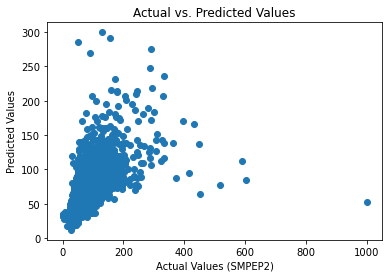

In [42]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values (SMPEP2)")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

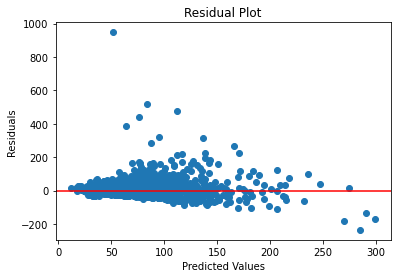

In [43]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

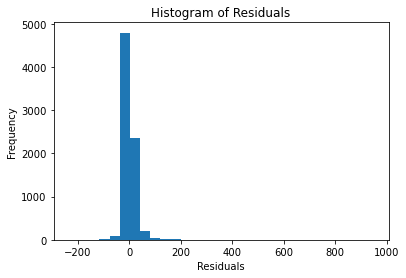

In [44]:
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()


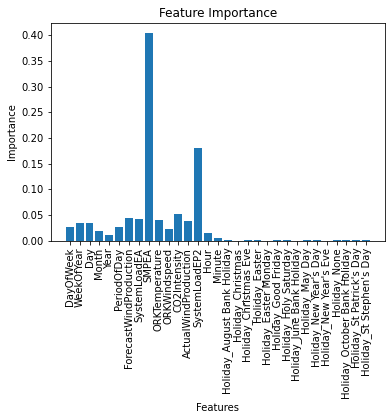

In [45]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

feature_importances = model.feature_importances_
features = X.columns

plt.bar(features, feature_importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(rotation=90)
plt.show()
